In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from scipy import linalg
import scipy

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")
PLOTS_FOLDER = os.path.join(CURRENT_FOLDER, "plots")

In [4]:
print(CURRENT_FOLDER)

/home/local/jarlehti/projects/gradu


In [5]:
df = pd.read_csv(f"{CURRENT_FOLDER}/napsu_MCMC_time_vs_epsilon_comparison.csv")

In [6]:
df

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,laplace_approximation,laplace_approximation_algorithm,query_str,query_list,missing_query,discretization,n_canonical_queries,junction_tree_width,suff_stat_dim
0,08WOPA7S,1245424.76743007,1246570.64680065,1145.8793705799617,Main run,adult_small,sex+hours-per-week,3.0,1.0992076159646117e-09,NUTS,True,torch_LBFGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08WOPA7S,1245424.768495976,1245430.28377712,5.51528114406392,Query selection,adult_small,NaN,3.0,1.0992076159646117e-09,NUTS,True,NaN,sex+hours-per-week,"[['sex', 'hours-per-week']]",NaN,NaN,NaN,NaN,NaN
2,08WOPA7S,1245430.283787028,1245430.284029522,0.00024249404668807983,Calculating full marginal query,adult_small,NaN,3.0,1.0992076159646117e-09,NUTS,True,NaN,sex+hours-per-week,"[['sex', 'hours-per-week']]",NaN,NaN,NaN,NaN,NaN
3,08WOPA7S,1245430.284040863,1245430.293427768,0.009386905003339052,Calculating canonical query set,adult_small,NaN,3.0,1.0992076159646117e-09,NUTS,True,NaN,sex+hours-per-week,"[['sex', 'hours-per-week']]",NaN,NaN,NaN,NaN,NaN
4,08WOPA7S,1245430.6003239,1245449.637452333,19.037128432886675,Laplace approximation,adult_small,NaN,3.0,1.0992076159646117e-09,NUTS,True,torch_LBFGS,sex+hours-per-week,"[['sex', 'hours-per-week']]",NaN,NaN,72.0,2.0,"(72,)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,KKJ7JNEN,1384466.677584721,1384475.474543273,8.796958551974967,Query selection,adult_large,NaN,0.1,1.0992076159646117e-09,NUTS,True,NaN,empty,[],NaN,NaN,NaN,NaN,NaN
1115,KKJ7JNEN,1384475.474558451,1384475.474976677,0.00041822600178420544,Calculating full marginal query,adult_large,NaN,0.1,1.0992076159646117e-09,NUTS,True,NaN,empty,[],NaN,NaN,NaN,NaN,NaN
1116,KKJ7JNEN,1384475.474996454,1384475.490804816,0.015808361815288663,Calculating canonical query set,adult_large,NaN,0.1,1.0992076159646117e-09,NUTS,True,NaN,empty,[],NaN,NaN,NaN,NaN,NaN
1117,KKJ7JNEN,1384475.840238443,1384544.774493816,68.93425537296571,Laplace approximation,adult_large,NaN,0.1,1.0992076159646117e-09,NUTS,True,torch_LBFGS,empty,[],NaN,NaN,132.0,4.0,"(132,)"


In [7]:
df = df[df['start'] != 'start']
data_type_dict = {
    'experiment_id': str,
    'start': float,
    'stop': float,
    'timedelta': float,
    'task': str,
    'dataset_name': str,
    'query': object,
    'epsilon': float,
    'delta': float,
    'MCMC_algo': str,
    'laplace_approximation': bool,
    'laplace_approximation_algorithm': str, 
    'query_str': str,
    'query_list': object,
    'missing_query': str,
    'discretization': bool,
    'n_canonical_queries': float,
    'junction_tree_width': float,
    'suff_stat_dim': object,
}

df = df.astype(data_type_dict)

In [8]:
df_with_task = df.query('task=="MCMC"')

In [9]:
df_with_task

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,laplace_approximation,laplace_approximation_algorithm,query_str,query_list,missing_query,discretization,n_canonical_queries,junction_tree_width,suff_stat_dim
5,08WOPA7S,1.245450e+06,1.246570e+06,1120.581293,MCMC,adult_small,NaN,3.0,1.099208e-09,NUTS,True,torch_LBFGS,sex+hours-per-week,"[['sex', 'hours-per-week']]",nan,True,72.0,2.0,"(72,)"
12,IY95MC4U,1.245448e+06,1.246595e+06,1146.714386,MCMC,adult_small,NaN,3.0,1.099208e-09,NUTS,True,torch_LBFGS,age+marital-status,"[['age', 'marital-status']]",nan,True,72.0,2.0,"(72,)"
19,YROVB8HH,1.245791e+06,1.246633e+06,841.930236,MCMC,adult_small,NaN,8.0,1.099208e-09,NUTS,True,torch_LBFGS,sex+hours-per-week,"[['sex', 'hours-per-week']]",nan,True,72.0,3.0,"(72,)"
26,CXTB9B2I,1.245449e+06,1.246687e+06,1237.732394,MCMC,adult_small,NaN,1.0,1.099208e-09,NUTS,True,torch_LBFGS,sex+hours-per-week,"[['sex', 'hours-per-week']]",nan,True,72.0,1.0,"(72,)"
33,DRFM1T77,1.245447e+06,1.246698e+06,1251.394521,MCMC,adult_small,NaN,8.0,1.099208e-09,NUTS,True,torch_LBFGS,age+hours-per-week,"[['age', 'hours-per-week']]",nan,True,84.0,3.0,"(84,)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,TJ4Z3BQO,1.384540e+06,1.386002e+06,1461.486225,MCMC,adult_large,NaN,8.0,1.099208e-09,NUTS,True,torch_LBFGS,empty,[],nan,True,106.0,4.0,"(106,)"
1097,BRSXO2Y3,1.384592e+06,1.387437e+06,2844.944339,MCMC,adult_large,NaN,1.0,1.099208e-09,NUTS,True,torch_LBFGS,empty,[],nan,True,106.0,4.0,"(106,)"
1104,JBCU751K,1.384558e+06,1.387531e+06,2972.669679,MCMC,adult_small,NaN,0.1,1.099208e-09,NUTS,True,torch_LBFGS,empty,[],nan,True,72.0,4.0,"(72,)"
1111,7Z9A36B0,1.384587e+06,1.390777e+06,6190.583572,MCMC,adult_large,NaN,0.3,1.099208e-09,NUTS,True,torch_LBFGS,empty,[],nan,True,106.0,4.0,"(106,)"


In [10]:
g = sns.catplot(data=df_with_task, kind="bar", x="epsilon", y="timedelta", col="LA", errorbar=None)
g.set_axis_labels("Epsilon", "Time (s)")
g.set_titles("Laplace approximation: {col_name}")
plt.show()

KeyError: 'LA'

[]

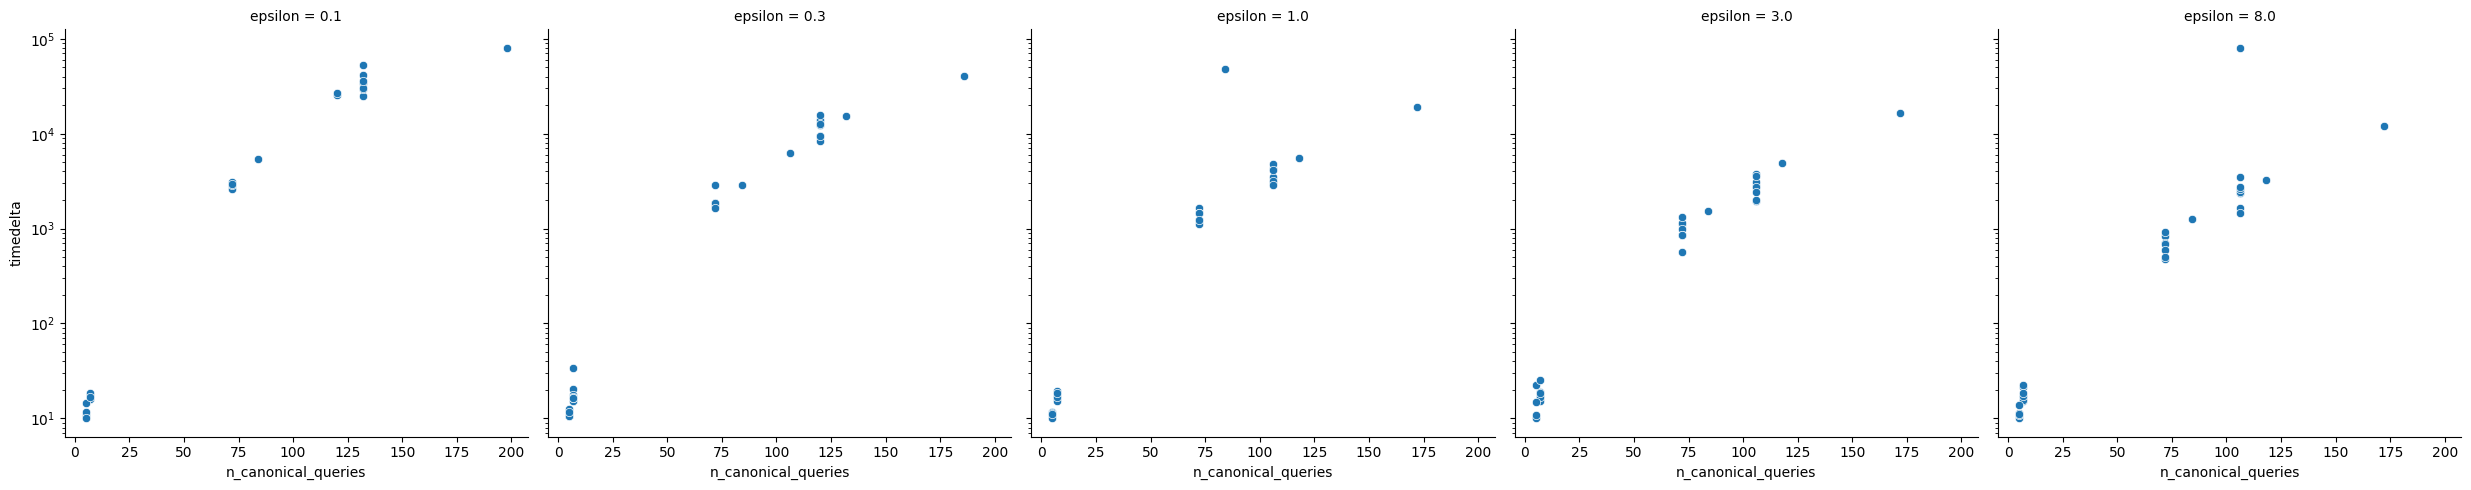

In [12]:
g = sns.relplot(
    data=df_with_task,
    x="n_canonical_queries", y="timedelta", col="epsilon",
)

plt.yscale("log")

plt.plot()

In [13]:
dummy_runtime_timer = pd.read_csv(os.path.join(RESULTS_FOLDER, "napsu_linear_regression_test_timer.csv"))
discretization_runtime_timer = pd.read_csv(os.path.join(CURRENT_FOLDER, "napsu_discretization_test_timer.csv"))
inpendence_pruning_runtime_timer = pd.read_csv(os.path.join(CURRENT_FOLDER, "napsu_independence_pruning_timer.csv"))

In [14]:
dummy_runtime_timer

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,...,query_str,query_list,missing_query,discretization,no_privacy,n_canonical_queries,junction_tree_width,suff_stat_dim,suff_stat,dp_suff_stat
0,6VXEVE4E,2283923.632027058,2283953.347842174,29.715815116185695,Main run,dummy_5x2,[],3.0,1e-08,NUTS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6VXEVE4E,2283923.633623428,2283928.582626581,4.949003153014928,Query selection,dummy_5x2,NaN,3.0,1e-08,NUTS,...,empty,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,6VXEVE4E,2283928.582635849,2283928.582745535,0.00010968605056405067,Calculating full marginal query,dummy_5x2,NaN,3.0,1e-08,NUTS,...,empty,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,6VXEVE4E,2283928.582755354,2283928.591250866,0.008495512418448925,Calculating canonical query set,dummy_5x2,NaN,3.0,1e-08,NUTS,...,empty,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,6VXEVE4E,2283929.172430097,2283929.825088401,0.6526583037339151,Laplace approximation,dummy_5x2,NaN,3.0,1e-08,NUTS,...,empty,[],NaN,NaN,False,9.0,2.0,"(9,)",[2385 2556 2606 2510 2409 2503 2588 2476 2468],[2390.84690271 2553.47395266 2614.65103684 251...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,506HVC3T,2324004.396078504,2324009.498633887,5.102555382996798,Query selection,dummy_5x7,NaN,0.1,1e-08,NUTS,...,empty,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4195,506HVC3T,2324009.498643956,2324009.499097717,0.0004537608474493027,Calculating full marginal query,dummy_5x7,NaN,0.1,1e-08,NUTS,...,empty,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4196,506HVC3T,2324009.499120129,2324009.514418587,0.015298458281904459,Calculating canonical query set,dummy_5x7,NaN,0.1,1e-08,NUTS,...,empty,[],NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4197,506HVC3T,2324010.151097961,2324054.022548075,43.87145011406392,Laplace approximation,dummy_5x7,NaN,0.1,1e-08,NUTS,...,empty,[],NaN,NaN,False,174.0,3.0,"(174,)",[279 279 257 251 316 137 285 278 291 282 273 1...,[ 4.20210844e+02 2.83385742e+02 2.72596654e+...


In [17]:
def clean_timer_results_and_get_MCMC_rows(df):
    df = df[df['start'] != 'start']
    data_type_dict = {
        'experiment_id': str,
        'start': float,
        'stop': float,
        'timedelta': float,
        'task': str,
        'dataset_name': str,
        'query': object,
        'epsilon': float,
        'delta': float,
        'MCMC_algo': str,
        'laplace_approximation': bool,
        'laplace_approximation_algorithm': str, 
        'query_str': str,
        'query_list': object,
        'missing_query': str,
        'discretization': bool,
        'n_canonical_queries': float,
        'junction_tree_width': float,
        'suff_stat_dim': object,
    }

    df = df.astype(data_type_dict)
    df = df[df['task'] == 'MCMC']
    df = df.sort_values(["dataset_name", "epsilon"])
    return df

df_dummy_dataset = clean_timer_results_and_get_MCMC_rows(dummy_runtime_timer)
df_dummy_dataset['experiment_name'] = "original_models"
discretization_df = clean_timer_results_and_get_MCMC_rows(discretization_runtime_timer)
discretization_df['experiment_name'] = "discretization_models"
inpendence_pruning_df = clean_timer_results_and_get_MCMC_rows(inpendence_pruning_runtime_timer)
inpendence_pruning_df['experiment_name'] = "independence_pruning_models"

In [18]:
df_with_task['experiment_name'] = "original_models"
combined = pd.concat([df_with_task, df_dummy_dataset, discretization_df, inpendence_pruning_df])

/tmp/ipykernel_25662/2743082214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_task['experiment_name'] = "original_models"


In [19]:
combined

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,...,missing_query,discretization,n_canonical_queries,junction_tree_width,suff_stat_dim,experiment_name,repeat_index,no_privacy,suff_stat,dp_suff_stat
5,08WOPA7S,1.245450e+06,1.246570e+06,1120.581293,MCMC,adult_small,NaN,3.0,1.099208e-09,NUTS,...,nan,True,72.0,2.0,"(72,)",original_models,NaN,NaN,NaN,NaN
12,IY95MC4U,1.245448e+06,1.246595e+06,1146.714386,MCMC,adult_small,NaN,3.0,1.099208e-09,NUTS,...,nan,True,72.0,2.0,"(72,)",original_models,NaN,NaN,NaN,NaN
19,YROVB8HH,1.245791e+06,1.246633e+06,841.930236,MCMC,adult_small,NaN,8.0,1.099208e-09,NUTS,...,nan,True,72.0,3.0,"(72,)",original_models,NaN,NaN,NaN,NaN
26,CXTB9B2I,1.245449e+06,1.246687e+06,1237.732394,MCMC,adult_small,NaN,1.0,1.099208e-09,NUTS,...,nan,True,72.0,1.0,"(72,)",original_models,NaN,NaN,NaN,NaN
33,DRFM1T77,1.245447e+06,1.246698e+06,1251.394521,MCMC,adult_small,NaN,8.0,1.099208e-09,NUTS,...,nan,True,84.0,3.0,"(84,)",original_models,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,RIWG2XNG,1.246194e+06,1.246679e+06,484.945809,MCMC,adult_independence_pruning,NaN,8.0,1.099208e-09,NUTS,...,compensation+education-num,True,70.0,1.0,"(70,)",independence_pruning_models,NaN,NaN,NaN,NaN
103,PSDACSR6,1.245441e+06,1.246699e+06,1258.275672,MCMC,adult_independence_pruning,NaN,8.0,1.099208e-09,NUTS,...,compensation+sex,True,84.0,1.0,"(84,)",independence_pruning_models,NaN,NaN,NaN,NaN
110,DOZSNBVE,1.245436e+06,1.246790e+06,1354.182091,MCMC,adult_independence_pruning,NaN,8.0,1.099208e-09,NUTS,...,age+sex,True,84.0,1.0,"(84,)",independence_pruning_models,NaN,NaN,NaN,NaN
124,WQ6R2USS,1.245435e+06,1.246841e+06,1405.950497,MCMC,adult_independence_pruning,NaN,8.0,1.099208e-09,NUTS,...,compensation+hours-per-week,True,84.0,1.0,"(84,)",independence_pruning_models,NaN,NaN,NaN,NaN


<Figure size 1600x1600 with 0 Axes>

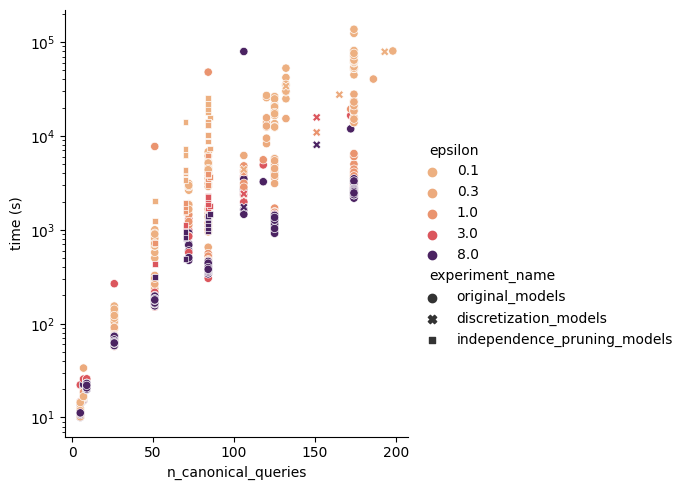

In [50]:
plt.figure(figsize=(16, 16))
g = sns.relplot(
    data=combined,
    x="n_canonical_queries", y="timedelta", hue="epsilon", style="experiment_name", palette="flare"
)

plt.ylabel("time (s)")
plt.yscale("log")
plt.show()
#g.savefig(os.path.join(PLOTS_FOLDER, "runtime_estimation_for_all_experiments.pdf"))

In [55]:
class LeastSquareModel:
    def __init__(self, coefs):
        self.coefs = coefs
        
    def predict(self, x, y):
        predictions = []
        
        for x_i, y_i in list(zip(x, y)):
            z_i = sum([item['coef'] * (x_i**(item['xd'])) * (y_i**(item['yd'])) for item in self.coefs])
            predictions.append(z_i)
            
        return np.array(predictions)
            
def least_squares_fit(x, y, z):
    
    n = len(x)
    degree = 3

    A = []

    for i in range(n):
        A.append([])
        for xd in range(degree+1):
            for yd in range(degree+1-xd):
                A[i].append((x[i]**xd)*(y[i]**yd))            

    c,_,_,_ = linalg.lstsq(A,z)

    j = 0

    coefficients = []
    
    for xd in range(0,degree+1):
        for yd in range(0,degree+1-xd):
            coefficient = c[j]
            coefficients.append({
                'xd': xd,
                'yd': yd,
                'coef': coefficient
            })
            j += 1
    
    return LeastSquareModel(coefficients)

In [56]:
x = combined['n_canonical_queries'].to_numpy()
y = combined['epsilon'].to_numpy()
z = combined['timedelta'].to_numpy()

In [57]:
model = least_squares_fit(x, y, z)

In [60]:
predictions = model.predict(x, y)
combined['predictions'] = predictions

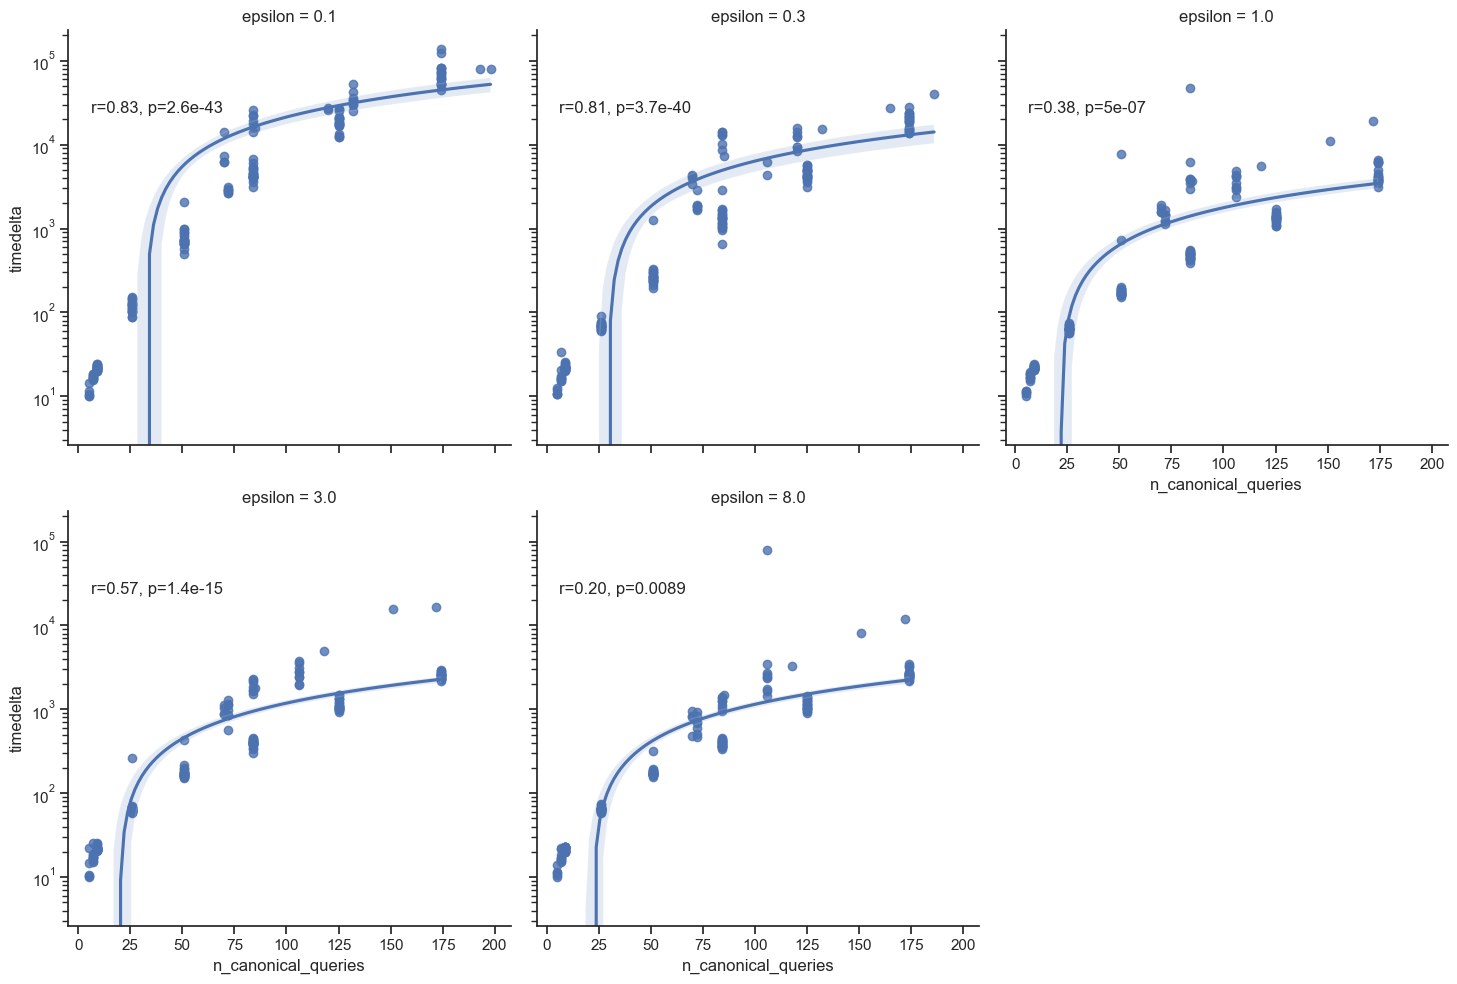

In [116]:
g = sns.lmplot(
    data=combined,
    x="n_canonical_queries", y="timedelta", col="epsilon", palette="flare",
    robust=True, col_wrap=3
)


def annotate(data, **kws):
    r, p = scipy.stats.pearsonr(data['n_canonical_queries'], data['timedelta'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)

plt.yscale("log")
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "runtime_estimation_line_fit.pdf"))